In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(28, 28)

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

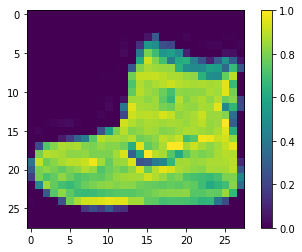

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

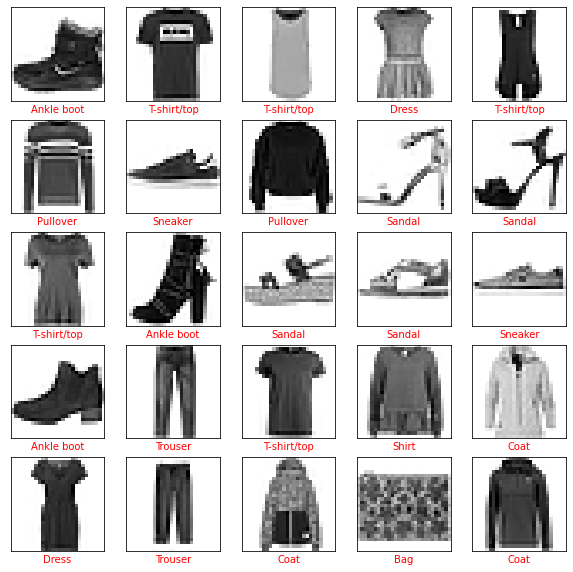

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    sub = plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sub.xaxis.label.set_color('red')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model

In [8]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5004 - accuracy: 0.8256

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8745
Test accuracy: 0.8744999766349792


In [11]:
predictions = model.predict(test_images)
np.argmax(predictions[0])
# sum(predictions[0])
# predictions[0][9]
predictions[0]
class_names[9]

'Ankle boot'

In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'white'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#000000")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


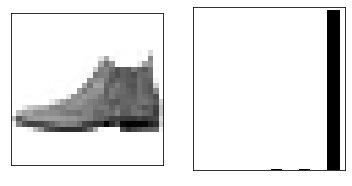

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

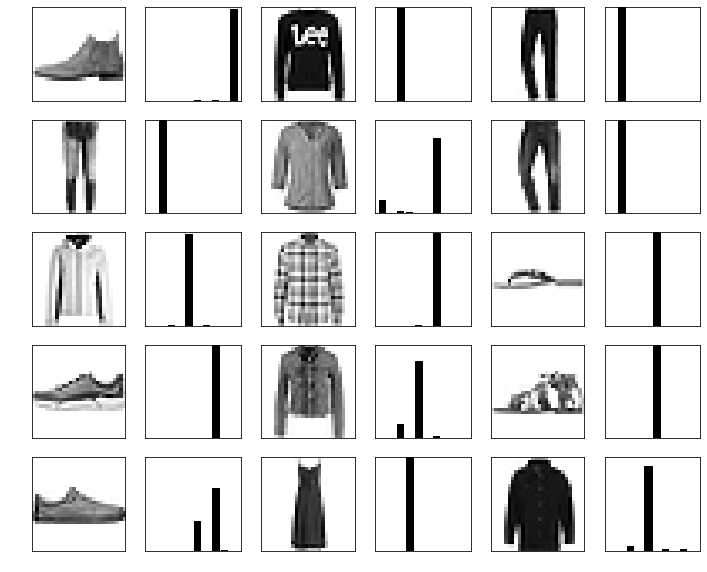

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [15]:
# Возьмём изображение из тестового набора данных
img = test_images[0]

In [16]:
#Добавим изображение в пакет, где он является единственным членом
img = (np.expand_dims (img, 0))

In [17]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.9533358e-09 6.8040779e-10 1.3985688e-09 3.6045062e-09 7.7019795e-09
  5.2988557e-03 2.1654807e-07 1.0319638e-02 3.9704133e-07 9.8438096e-01]]


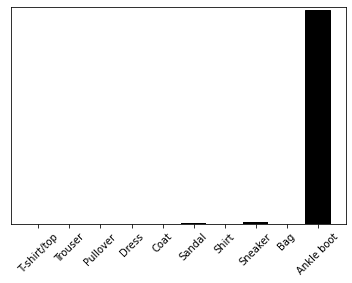

In [18]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [24]:
result_ind = np.argmax(predictions_single[0])
class_names[result_ind]

'Ankle boot'

In [57]:
model.save_weights('weight.h5')
print('model saved')

model saved


In [56]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
# loaded_model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#
# loaded_model
score = loaded_model.evaluate(test_images[0])
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

ValueError: No model found in config file.

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.load_weights('weight.h5')

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



AttributeError: in user code:

    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:914 test_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:322 _build
        self._metrics, y_true, y_pred)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1118 map_structure_up_to
        **kwargs)
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1214 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /Users/danonya666/PycharmProjects/primat/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:442 _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'NoneType' object has no attribute 'shape'


In [1]:
print(img.shape)
print(test_images[0].shape)
img = (np.expand_dims (test_images[0], 0))

model.predict(img)



NameError: name 'img' is not defined